# Trabajo Tema 2

## Problema 1 - Datos demográficos de Barcelona

In [169]:
#Cargamos los datos en la variable data
data <- read.csv(file='HAVD_Exo02.csv', header=TRUE, sep=',')

### 1.1 Representar un histograma con la distribución de la población de la ciudad por edades.

Para la creación del histograma, se ha usado un boxplot() en vez de un hist() ya que le dataset dado ya contiene datos de frecuencia (cuantas personas con edad X existen dado un distrito). Dicho histograma representa la distribución de población de Barcelona, es decir, teniendo en cuenta la totalidad de distritos presentes en el dataset.

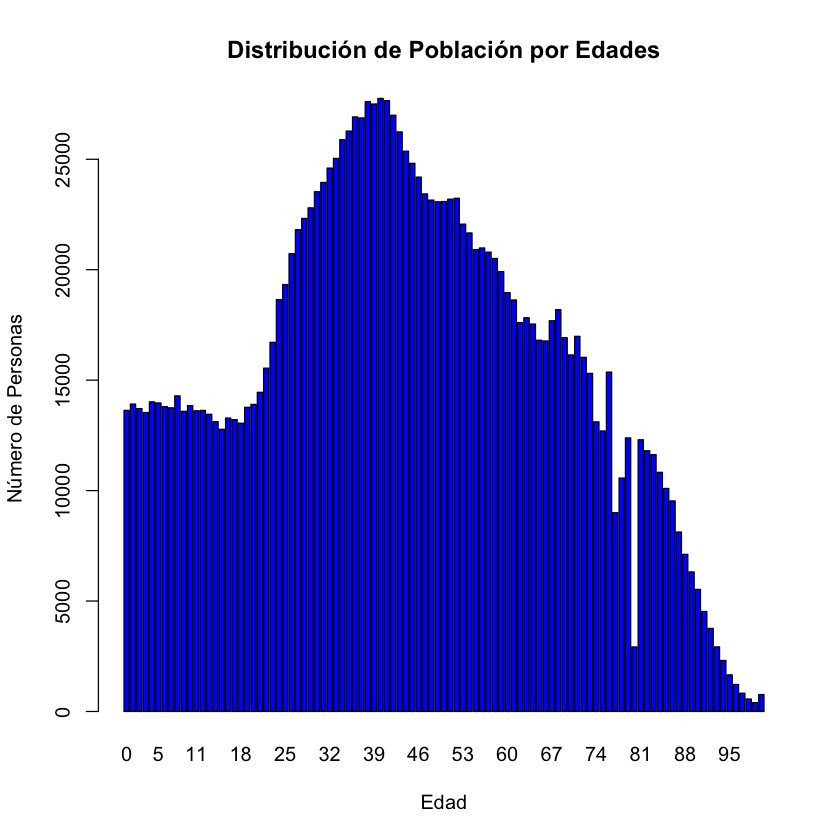

In [174]:
par(bg = "white")
barplot(as.numeric(data[1, 4:ncol(data)]),
        names.arg = 0:100,
        main = "Distribución de Población por Edades",
        xlab = "Edad",
        ylab = "Número de Personas",
        col = "blue"
        )


En dicho histograma, observamos como sigue una distribución parecida a una normal, a excepción del límite izquierdo, en donde el rango de 0 a 11 años se mantiene estable alrededor de 14000 personas. Otro aspecto que comentar es el valle presente en los 80 años aproximadamente. Dicha diferencia nos hace saltar las alarmas de si el recuento total de población está bien registrado en el dataset.


Para ello, se ha hecho otro histograma, pero esta vez sumando nosotros todos los valores de la población por distritos, y observamos que efectivamente, hay una contradicción entre la suma total en los 80 años y el total presente en el dataset.

También hay que destacar como la última barra sobresale. Eso se debe a que, tal y como dice el enunciado: El último valor representa las personas de más de cien años. Eso significa que, en total, hay más personas con más de 100 años que no personas con 100 (o incluso 99 y 98).


  [1]     0     0     0     0     0     0     0     0     0     0     0     0
 [13]     0     0     0     0     0     0     0     0     0     0     0     0
 [25]     0     0     0     0     0     0     0     0     0     0     0     0
 [37]     0     0     0     0     0     0     0     0     0     0     0     0
 [49]     0     0     0     0     0     0     0     0     0     0     0     0
 [61]     0     0     0     0     0     0     0     0     0     0     0     0
 [73]     0     0     0     0     0     0     0     0 10000     0     0     0
 [85]     0     0     0     0     0     0     0     0     0     0     0     0
 [97]     0     0     0     0     0


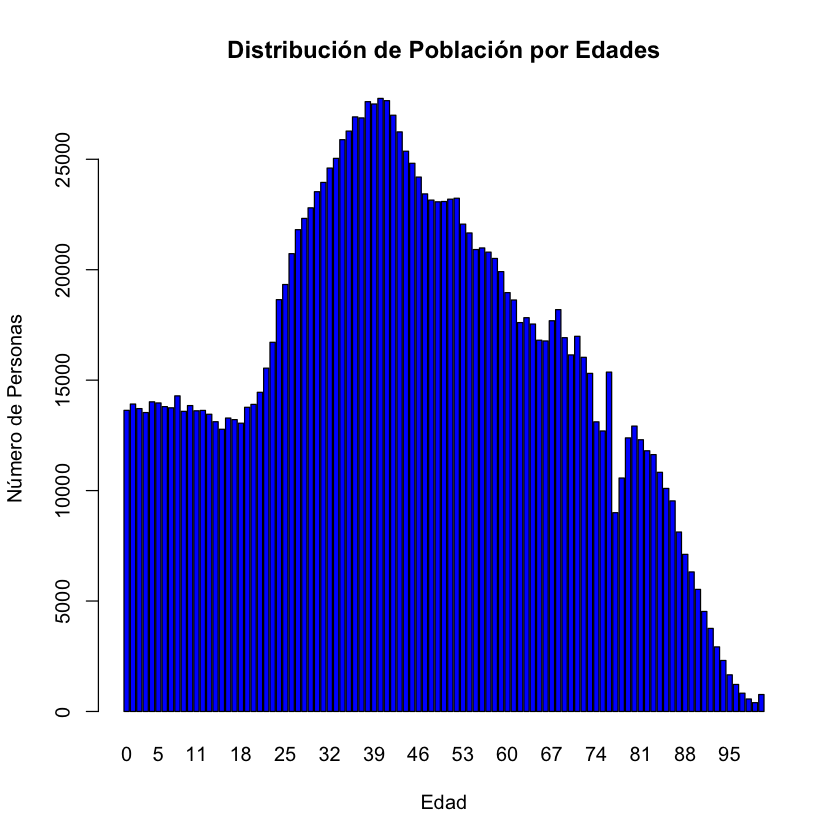

In [175]:
x <- c()
for (val in 0:101)
{
    x[val] <- sum(data[2:nrow(data), 3+val])
}

par(bg = "white")
barplot(x,
        names.arg = 0:100,
        main = "Distribución de Población por Edades",
        xlab = "Edad",
        ylab = "Número de Personas",
        col = "blue"
        )

#2920 a 12920
resta <- (x - as.numeric(data[1, 4:ncol(data)]))
print(resta)

### 1.2 Representar un boxplot para la distribución de edades de la ciudad.

Para este boxplot, se ha usado nuevamente la fila de TOTAL en el dataset, pero esta vez con el valor observado corregido (80 años -> 12920). En el siguiente boxplot, podemos ver como a priori no hay outlines, por lo que, a nivel BARCELONA, no hay datos extremos o inusuales. También observamos como la línea central del rectángulo esta aproximadamente a la mitad, denotando una posible distribución normal de nuestros datos. Según el boxplot, la mediana debería estar entorno a los 45 años.

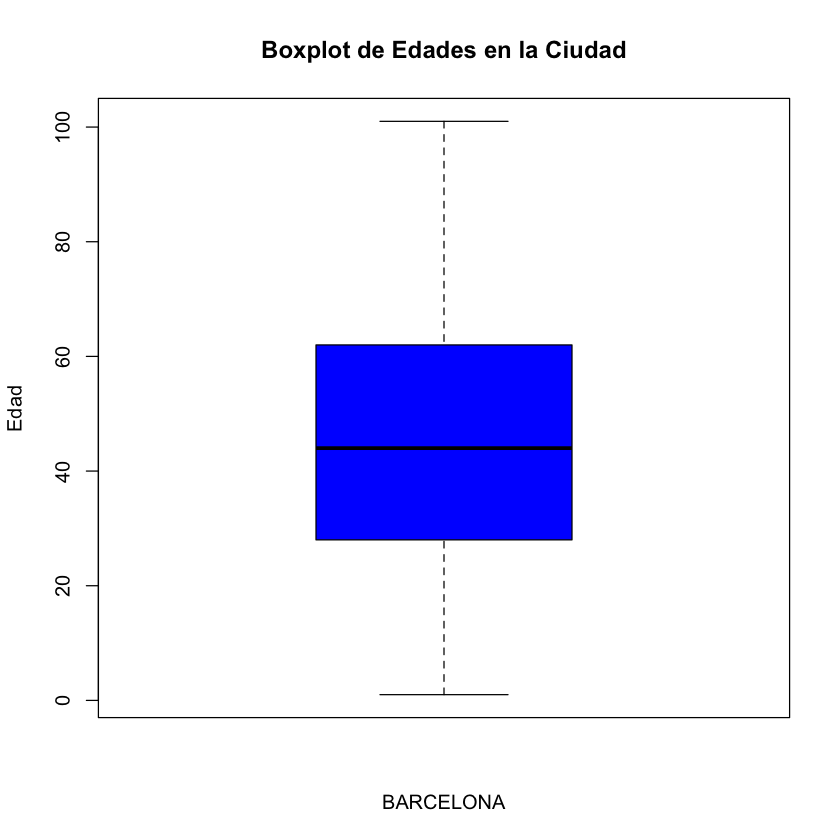

In [177]:

freqEdades <- rep(1:101, times=as.numeric(data[1, 4:ncol(data)]))
par(bg = "white")
boxplot(freqEdades,
        main = "Boxplot de Edades en la Ciudad",
        xlab = "BARCELONA",
        ylab = "Edad",
        col = "blue",
        )



Al igual que el apartado 1, para asegurarnos que este resultado es coherente, se ha representado dicho boxplot por barrios. Simplemente comentar como en el primer distrito, los barrios que conforman dicho distrito presentan una gran dispersión en la edad, ya que de media las personas presentes allí tienen entorno a 38 años, pero hay mucha presencia de outliners, denotando que gente mayor también vive en dicho distrito. Además, en el distrito 6, observamos como la línea central del rectángulo no está centrada, y hay una concentración de gente de por encima de la media en dicho distrito, lo que nos hace pensar que viven personas cercanas a la tercera edad. 

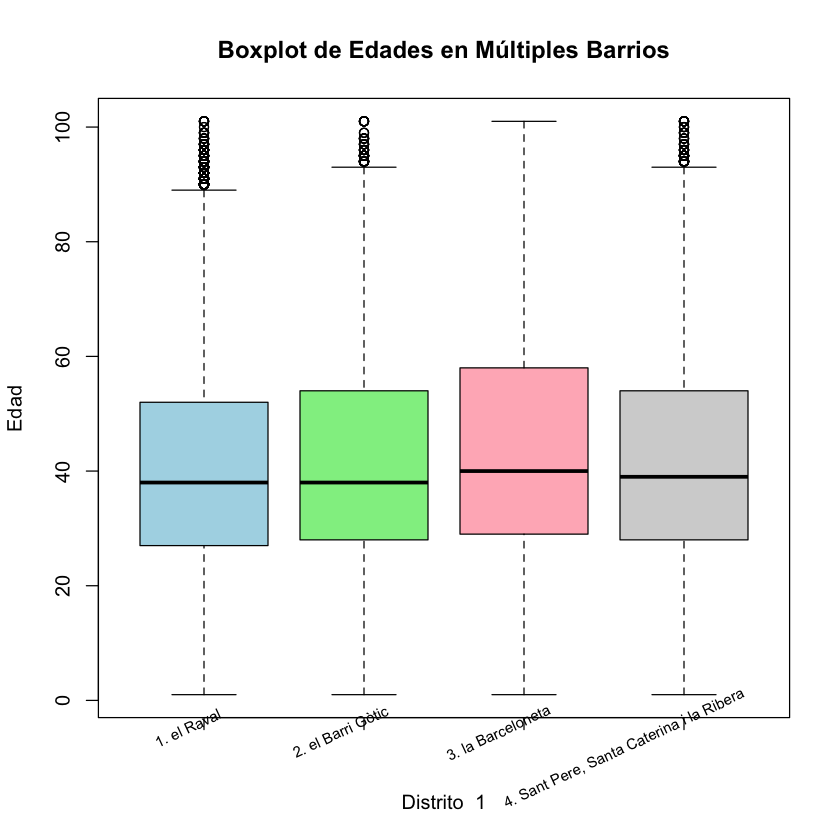

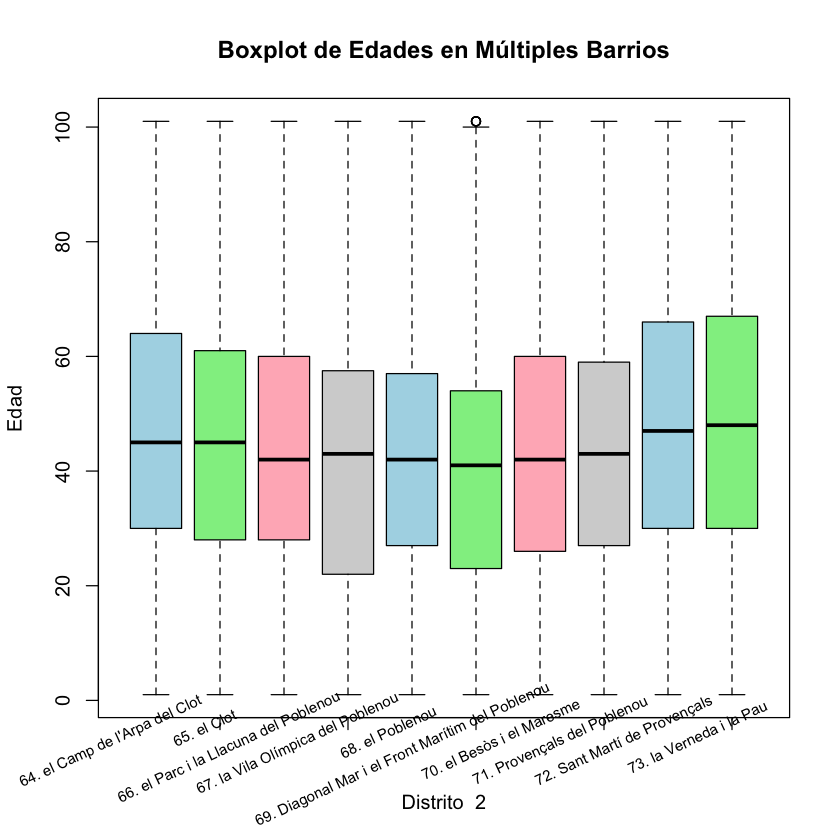

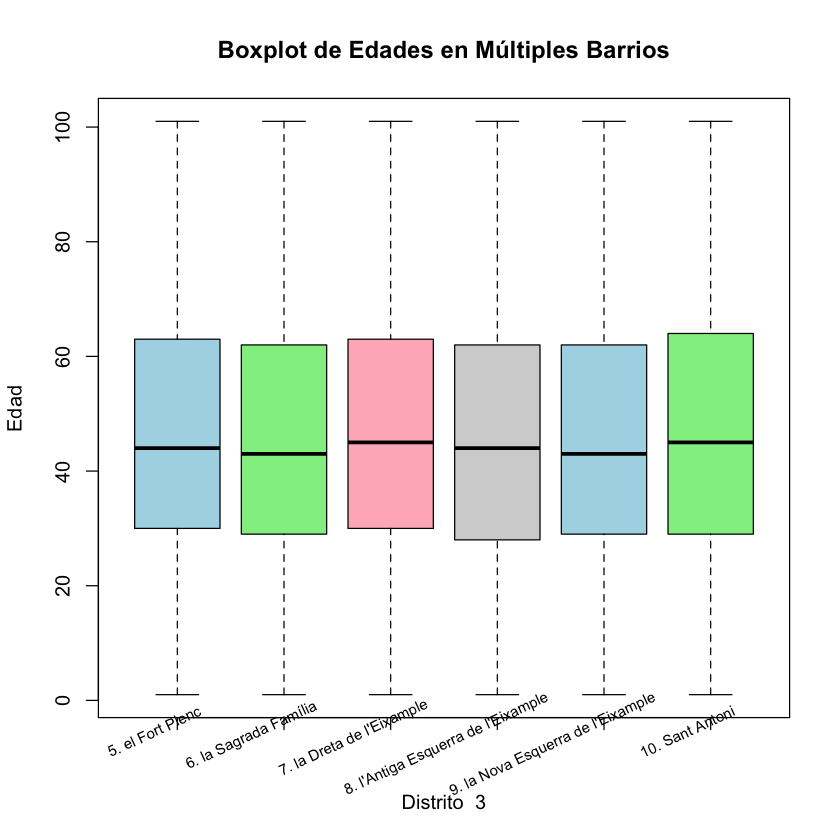

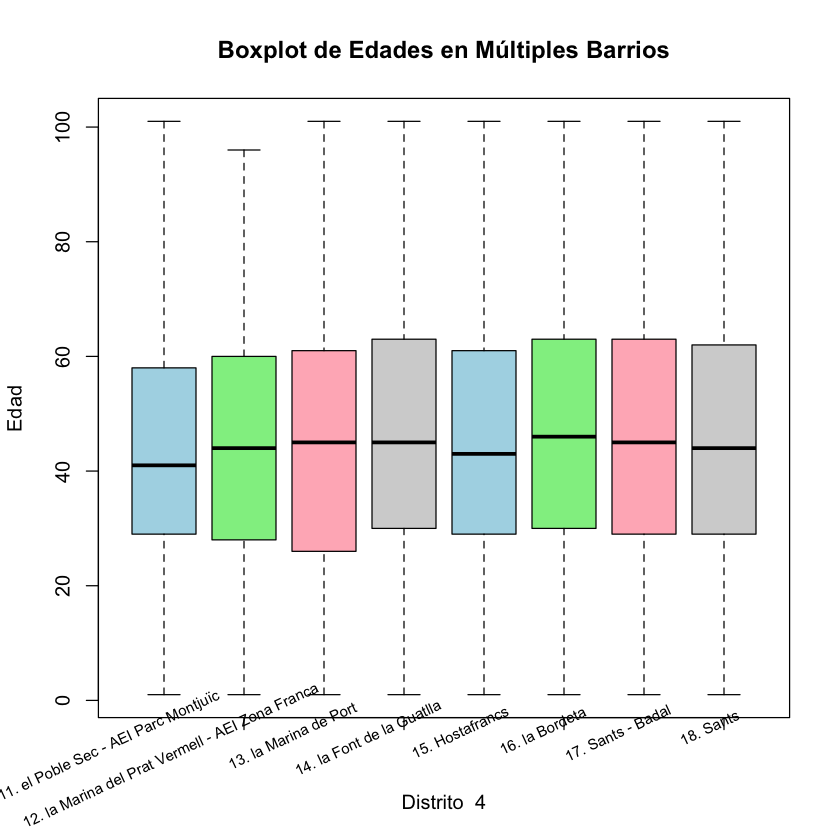

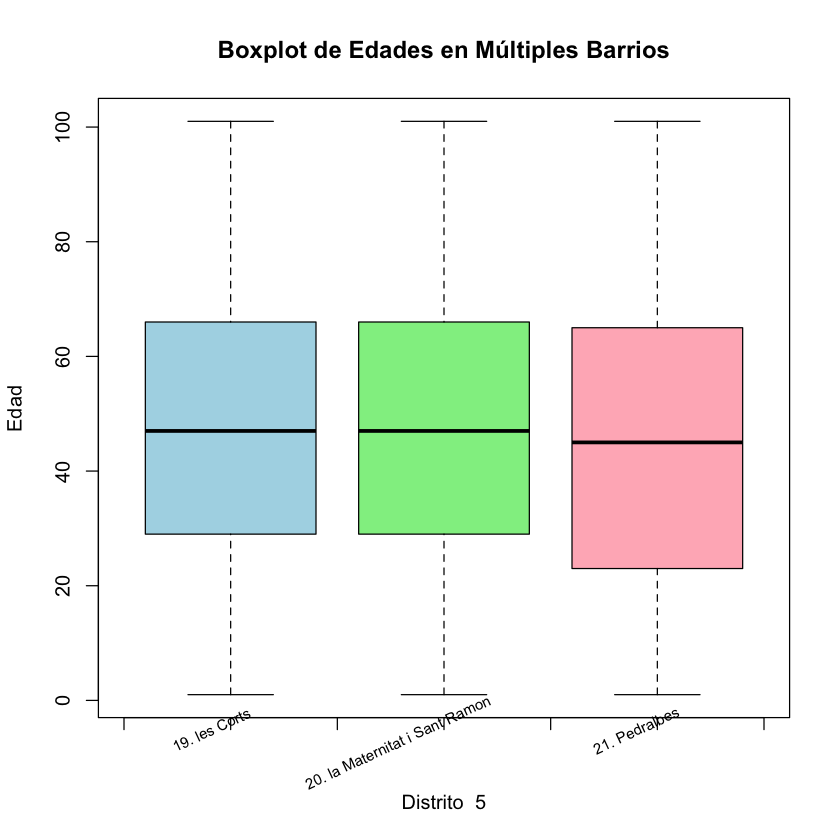

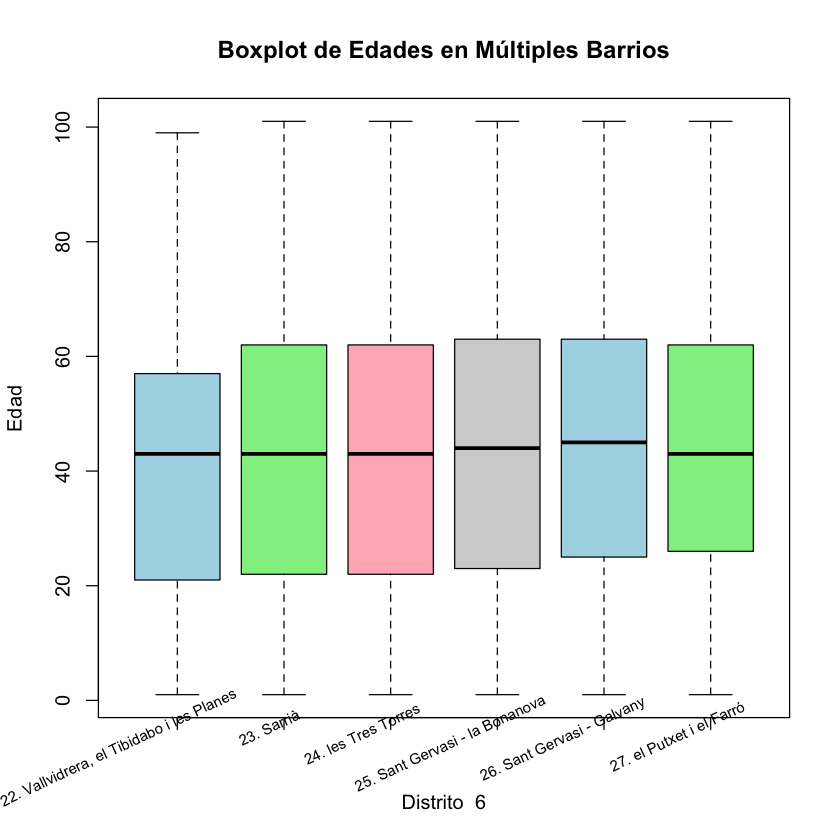

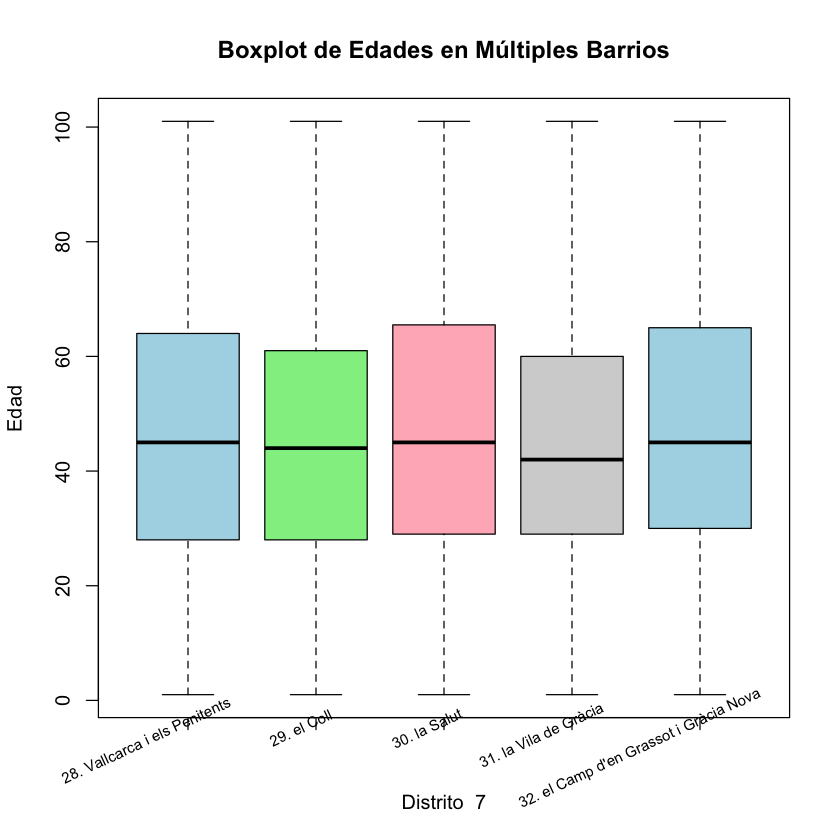

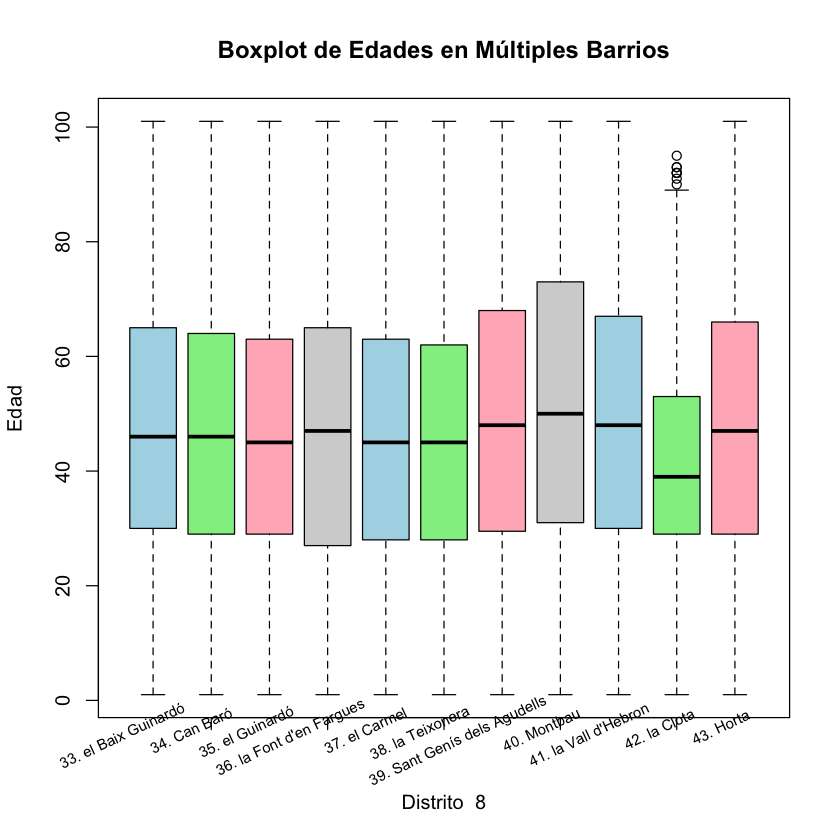

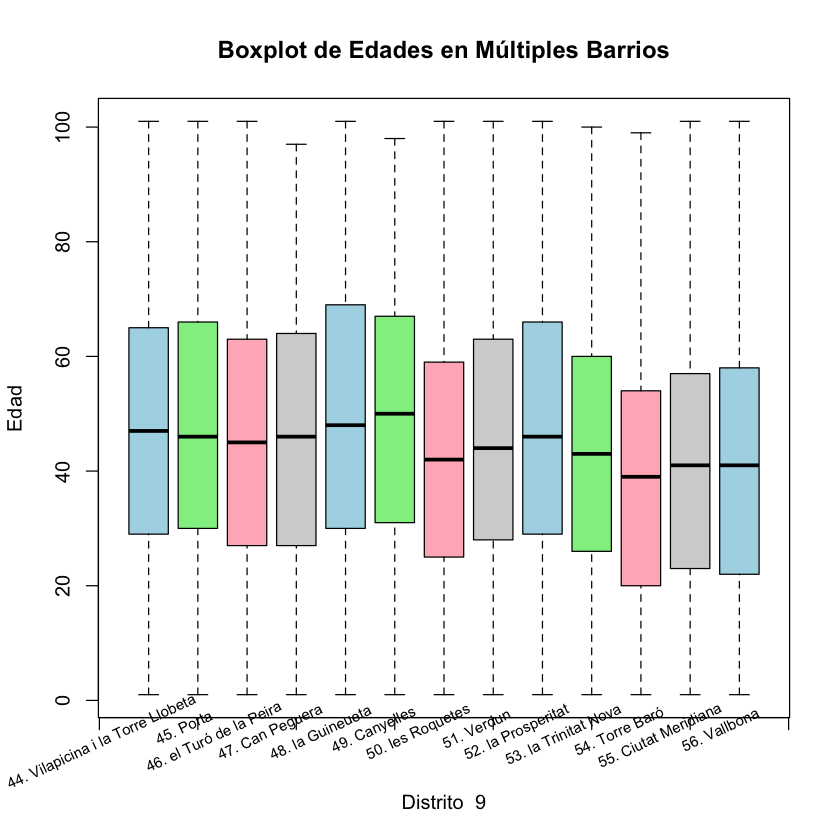

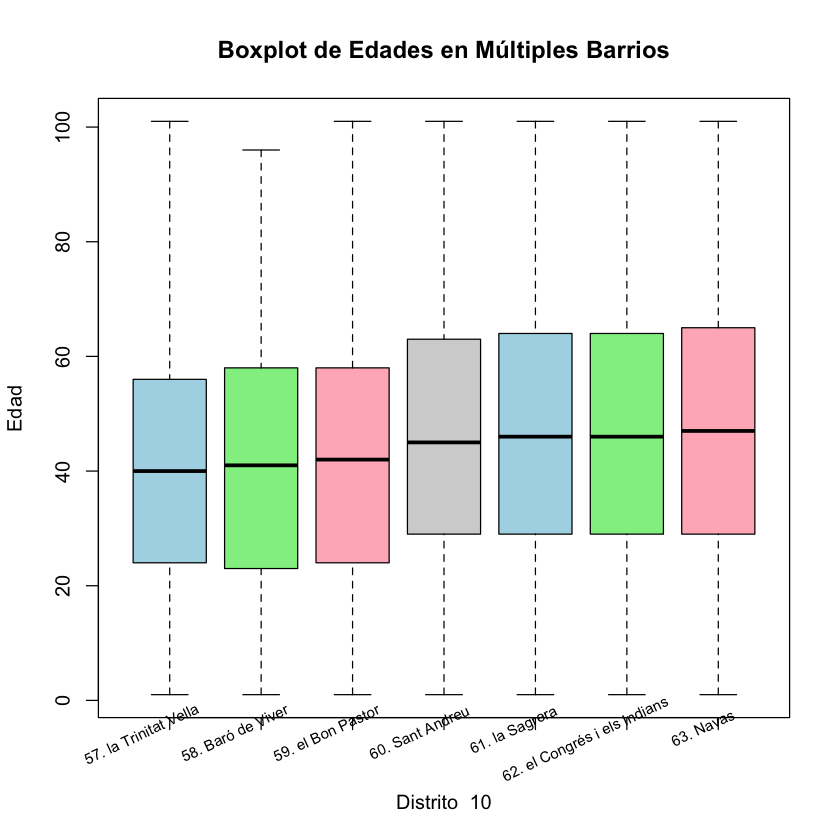

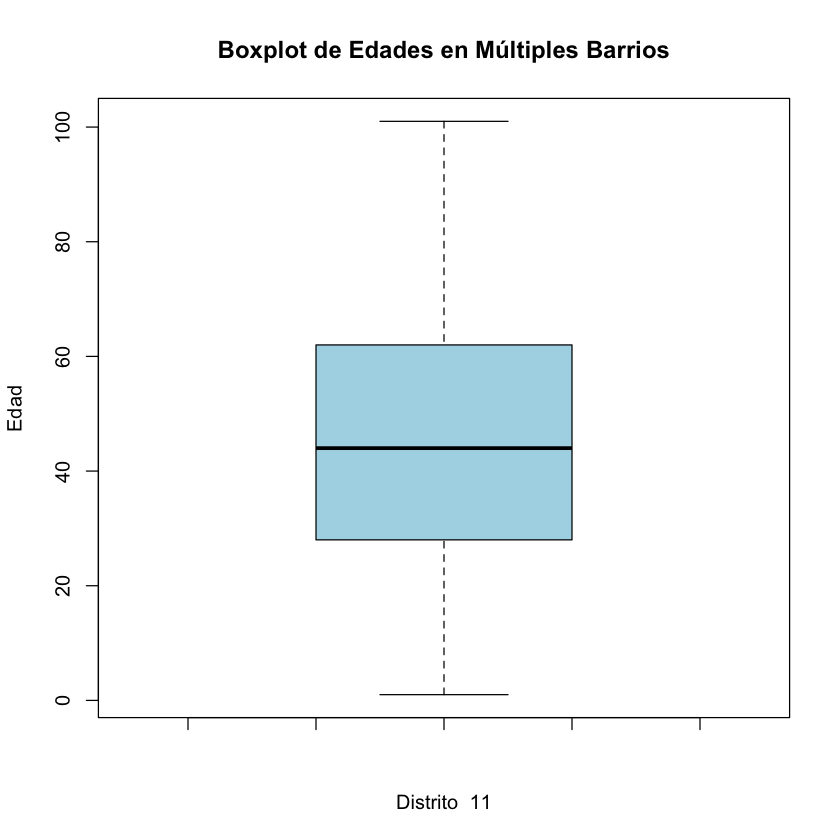

In [59]:
grouped_data <- split(data, data$Dte.)

par(mfrow = c(1, 1)) 
par(bg = "white")

for (i in seq_along(grouped_data)) {
  group <- grouped_data[[i]]
  freqs <- c()
  barris <- c()
  for(row in 1:nrow(group)){
    freqs <- c(freqs, rep(1:101, times=as.numeric(group[row, 4:ncol(group)])))
    barris <- c(barris, rep((as.character(group$Barris))[row], each=sum(group[row, 4:ncol(group)])))
  }

  boxplot(freqs ~ barris,
        main = "Boxplot de Edades en Múltiples Barrios",
        xlab = paste("Distrito ", i),
        ylab = "Edad",
        col = c("lightblue", "lightgreen", "lightpink", "lightgray"),
        border = "black",
        xaxt = "n"
      )
  
  axis(side = 1, labels = FALSE)

  text(x = 1:length(c(as.character(group$Barris))),
     y = par("usr")[3] - 0.45,
     labels = c(as.character(group$Barris)),
     xpd = NA,
     cex = 0.75,
     srt = 25,
     adj=0.75
     )

}



### 1.3 Calcular la media y la desviación estándar de la distribución de edades de la ciudad.

Como hemos observado en la distribución, en cierto punto podemos decir que esta sesgada hacia la izquierda. Con esta observación, y viendo como la desviación estándard es grande, detectamos una variabilidad de las edades desde la media hacia valores más bajos.

Por lo que hace la media de edad de unos 45 años, junto con la distribución observada, podemos afirmar que en Barcelona hay una mayor presencia de personas jovenes que de mayores. Por la propia naturaleza del ser humano, resultan datos ciertamente coherentes.


In [108]:
cat("Media de edades:", mean(freqEdades), "\n")
cat("Desviación estándar de edades:", sd(freqEdades), "\n")

Media de edades: 44.72695 
Desviación estándar de edades: 23.10579 


## Problema 2 - Halcones

In [185]:
dataH <- read.csv(file='Halcon.csv', header=TRUE, sep=',', dec='.')

## 2.1 Obtened una visión global de todas las variables y comentadlas

Para poder obtener una visión global de las variables presentes, primero se han usado las funciones vistas en clase, y después se han agrupado variables según temática y analizado en consecuencia. 

Primeramente, observamos la estructura del dataset, en donde vemos 891 observaciones y 15 variables para cada una. A primera vista, podemos destacar como las variables CaptureTime y ReleaseTime presentan un valor nulo en forma de “” o “ “. Ese dato lo debemos de tener en cuenta en futuros análisis. Esta situación también está presente en el BandNumber, por lo que algunos halcones no estarán registrados. Tenemos 3 tipos de halcones registrados en este dataset los cuales puede que no podamos identificar su sexo, ya que dicha variable puede tomar un valor nulo “”. 


In [186]:

str(dataH)

'data.frame':	891 obs. of  15 variables:
 $ X          : int  1 3 4 5 6 7 8 9 10 11 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 10 ...
 $ Day        : int  19 23 23 27 28 28 29 29 30 5 ...
 $ Year       : int  1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 ...
 $ CaptureTime: Factor w/ 306 levels " ","10:00","10:04",..: 178 135 40 59 68 178 85 258 189 178 ...
 $ ReleaseTime: Factor w/ 59 levels ""," ","10:20",..: 1 2 2 2 2 2 2 2 2 2 ...
 $ BandNumber : Factor w/ 891 levels " ","1142-09240",..: 843 844 797 432 278 845 846 847 279 848 ...
 $ Species    : Factor w/ 3 levels "CH","RT","SS": 2 2 1 3 2 2 2 2 2 2 ...
 $ Age        : Factor w/ 2 levels "A","I": 2 2 2 2 2 2 1 1 2 2 ...
 $ Sex        : Factor w/ 3 levels "","F","M": 1 1 2 2 1 1 1 1 1 1 ...
 $ Wing       : num  385 381 265 205 412 370 375 412 405 393 ...
 $ Weight     : int  920 990 470 170 1090 960 855 1210 1120 1010 ...
 $ Culmen     : num  25.7 26.7 18.7 12.5 28.5 25.3 27.2 29.3 26 26.3 ...
 $ Hallux     : num  30.1 31.3 23.

Dicho esto, se ha procedido a hacer un análisis de las variables por separado. Empezamos con la fecha (Month, Day y Year). Se ha comprobado si dicha fecha es real y no hay algún error en el registro. Para ello, se ha procedido a hacer un try-catch[1] para comprobar que el formato es en efecto correcto, lo que ha dado que si para todas las observaciones. Lo que no se ha comprobado es si dicha fecha es cierta, es decir, existió en el calendario.

In [187]:
dates <- try(as.Date(paste(dataH$Year, dataH$Month, dataH$Day, sep = "-"), "%Y-%m-%d"), silent = TRUE)
count <- 0
if("try-error" %in% class(dates) || is.na(dates)) {
  count <- count + 1
 
}

 print(paste("Count: ", count))


[1] "Count:  0"


Seguidamente, se ha buscado una tendencia de hora de captura de los halcones. Sacando un histograma de las veces que se ha capturado un halcón en base a dicha hora, se ha extraído el siguiente histograma.

En dicho histograma podemos observar como la hora más frecuente para capturar halcones (por lo que podemos deducir que mejor) es entorno al mediodía, por allá a la 13. Con dicho análisis, hemos podido observar cómo hay un error en uno de los registros. Tal y como vemos a continuación, existe la presencia de un 9.12 como valor de hora de captura. De dicho dato podemos deducir que o bien está mal capturado en el dataset, o el “.” debería ser un “:”.

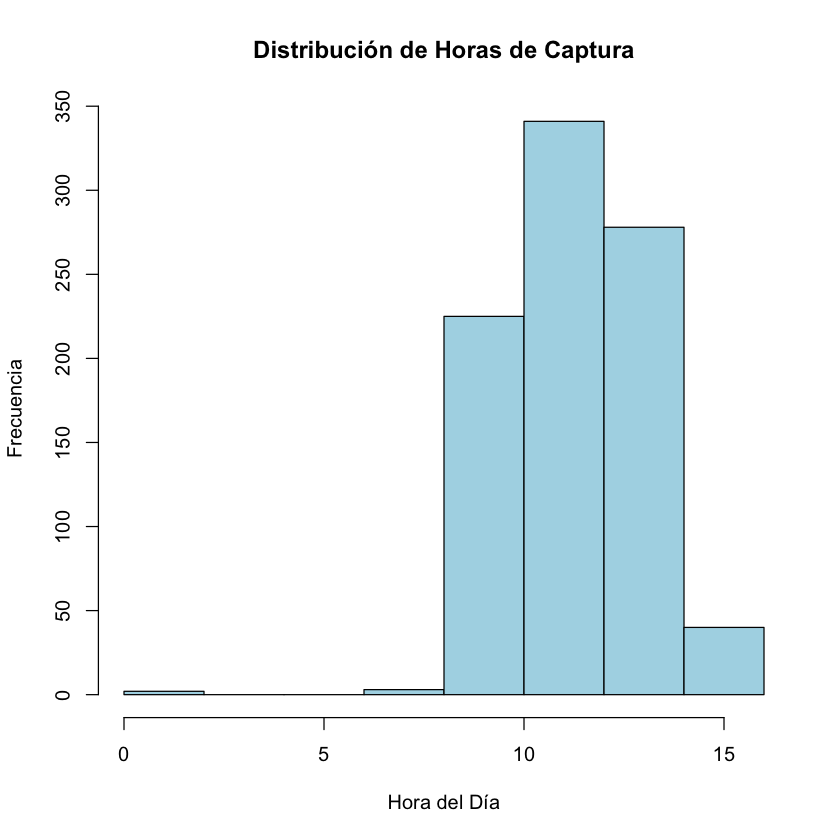

In [189]:

par(bg = "white")

#hist(as.numeric(matrix(unlist(strsplit(as.character(dataH$CaptureTime), ":")[!is.na(dataH$CaptureTime)]),ncol=2,byrow=T)[,1]), 
hist(as.numeric(matrix(unlist(strsplit(as.character(dataH$CaptureTime), ":")[grepl(":",dataH$CaptureTime)]),ncol=2,byrow=T)[,1]), 
      breaks = 10, 
      col = "lightblue", 
      main = "Distribución de Horas de Captura", 
      xlab = "Hora del Día", 
      ylab = "Frecuencia"
      )




A continuación, también se ha querido extraer el tiempo máximo y mínimo entre que se captura un halcón y se deja en libertad. Dicho análisis ha aportado dos observaciones. Primeramente, la gran mayoría de registros en el dataset no tienen una fecha de liberación, por lo que deducimos que, a efectos de la última fecha presente en el dataset, aún no se habían liberado. La segunda observación es que hay algunos registros en que la hora de captura es mayor a la hora de liberación. Dicha problemática se ha observado al sacar el máximo y mínimo de horas capturado.

Una posible explicación es que la hora de liberación corresponde a otro día, posterior al que figura en el registro en cuestión. Por ende, con la información del dataset, no podemos asegurar cuanto tiempo se ha mantenido capturado dicho halcón. También comentar que, aunque la fecha de liberación sea mayor a la de captura, nadie asegura que esa hora sea de la misma fecha, por lo que los resultados mostrados en la figura anterior vienen sesgados por dicha problemática. 

In [ ]:
valid_rows <- dataH$CaptureTime != " " & dataH$ReleaseTime != " " & dataH$CaptureTime != "" & dataH$ReleaseTime != "" & grepl(":",dataH$CaptureTime) & grepl(":",dataH$ReleaseTime)
capture_time <- as.numeric(matrix(unlist(strsplit(as.character(dataH$CaptureTime), ":")[valid_rows]),ncol=2,byrow=T)[,1]) * 60 + as.numeric(matrix(unlist(strsplit(as.character(dataH$CaptureTime), ":")[valid_rows]),ncol=2,byrow=T)[,2])
release_time <- as.numeric(matrix(unlist(strsplit(as.character(dataH$ReleaseTime), ":")[valid_rows]),ncol=2,byrow=T)[,1]) * 60 + as.numeric(matrix(unlist(strsplit(as.character(dataH$ReleaseTime), ":")[valid_rows]),ncol=2,byrow=T)[,2])

diff <- release_time - capture_time

print(paste("Máximo tiempo capturado:", max(diff), "minutos"))
print(paste("Mínimo tiempo capturado:", min(diff), "minutos"))
print(paste("Tiempo promedio capturado:", mean(diff), "minutos"))


Ahora pasamos al BandNumber, en donde se ha querido observar si hay relación entre el primer número presente en este y el tipo de halcón registrado. Antes de eso, destacar que durante el proceso se ha encontrado un halcón sin registro. Dicho esto, se ha observado que no hay gran correlación entre el número y el tipo de halcón. Aun así, cabe destacar que algunos números, como el 1387 o el 877 están muy relacionados con el halcón RT (red-tailed). Debido al desconocimiento del dominio, no se pueden sacar conclusiones más allá.

In [190]:

# valid_rows <- dataH$BandNumber != " " & dataH$BandNumber != " " & grepl("-",dataH$BandNumber)
summary_table <- table(matrix(unlist(strsplit(as.character(dataH$BandNumber), "-")),ncol=2,byrow=T)[,1], dataH$Species)

print(summary_table)



Warning message in matrix(unlist(strsplit(as.character(dataH$BandNumber), "-")), :
“la longitud de los datos [1781] no es un submúltiplo o múltiplo del número de filas [891] en la matriz”

            
             CH RT SS
  00201       0  0  1
  00202       1  0  0
  00203       1  0  0
  00205       1  0  0
  00206       1  0  0
  00344       0  0  1
  04601       0  1  0
  04602       0  1  0
  04603       0  1  0
  04604       0  1  0
  04605       0  1  0
  04607       0  1  0
  04608       0  1  0
  04609       0  1  0
  04610       0  1  0
  04611       0  1  0
  04612       0  1  0
  04613       0  1  0
  04614       0  1  0
  04616       0  1  0
  04617       0  1  0
  04618       0  1  0
  04619       0  1  0
  04620       0  1  0
  04622       0  1  0
  04623       0  1  0
  04624       0  1  0
  04625       0  1  0
  04626       0  1  0
  04627       0  1  0
  04628       0  1  0
  04629       0  1  0
  04630       0  1  0
  04631       0  1  0
  04632       0  1  0
  04633       0  1  0
  04634       0  1  0
  04635       0  1  0
  04636       0  1  0
  04637       0  1  0
  04638       0  1  0
  04639       0  1  0
  04640       0  1  0
  04641       0  1 

Por último, a través de tablas de contingencia, se ha querido observar relaciones entre los tipos de halcones y su edad/sexo. Respecto a la edad, podemos observar cómo, en general, hay mas adultos que inmaduros, a excepción de los Cooper’s, que están ciertamente equilibrados. El caso que más llama la atención son los Red-tailed, destacando una gran cantidad de individuos inmaduros.

In [192]:
age_by_species <- table(dataH$Species, dataH$Age)
print(age_by_species)


    
       A   I
  CH  31  38
  RT 120 447
  SS  68 187


Si, por otro lado, observamos el sexo, vemos como nuevamente los RT presentan un caso especial. Esto se debe a que es una especie de halcón que necesita de un estudio exhaustivo[2] para determinar su sexo, ya que no es hasta su etapa más adulta que presenta una clara diferencia a nivel corporal (los machos suelen ser un 25% más grandes que las hembras) [3]. 

In [191]:
age_by_species <- table(dataH$Species, dataH$Sex)
print(age_by_species)

subset_rows <- subset(dataH, Species == "RT" & Sex == "F")
print(subset_rows)

    
           F   M
  CH   1  35  33
  RT 564   3   0
  SS   1 132 122
      X Month Day Year CaptureTime ReleaseTime BandNumber Species Age Sex Wing
520 536     9  29 2000       10:25             1207-72638      RT   I   F  410
522 538     9  29 2000       13:00             1177-04639      RT   I   F  410
523 539     9  29 2000       13:30             1207-74639      RT   A   F  425
    Weight Culmen Hallux Tail
520   1120   28.5   33.6  229
522   1200   26.7   29.4  247
523   1120   29.4   33.3  222


## 2.2 Realizad un estudio de estadística descriptiva de las variables Wing y Tail 

Una vez hechas ambas tablas de contingencia, resulta difícil extraer conclusiones de estas. Es por eso que se han realizado un par de análisis más para extraer conclusiones.

In [194]:

wing_spices_table <- table(dataH$Wing,dataH$Species)
print(wing_spices_table)

tail_spices_table <- table(dataH$Tail,dataH$Species)
print(tail_spices_table)


      
       CH RT SS
  37.2  0  1  0
  111   0  1  0
  143   0  0  1
  145   1  0  0
  155   0  0  2
  156   0  0  4
  157   0  0  2
  158   0  0  2
  159   0  0  5
  160   0  0  7
  161   0  0 13
  162   0  0  6
  163   0  0  7
  164   0  0  4
  165   0  0 11
  166   0  0  6
  167   0  0  3
  168   0  0  8
  169   1  0  4
  170   0  0  8
  171   0  0  5
  172   0  0  4
  173   0  0  1
  174   0  0  1
  175   0  0  3
  176   0  0  1
  177   0  0  3
  178   0  0  1
  179   0  0  2
  181   0  0  1
  183   0  0  1
  184   0  0  1
  185   0  0  1
  188   0  0  1
  190   0  0  7
  191   0  0  7
  192   0  0  4
  193   0  0 11
  194   1  0 10
  195   0  0  9
  196   0  0  8
  197   0  0  6
  198   0  0  6
  199   1  1  9
  200   0  0  7
  201   0  0  6
  202   0  0  8
  203   0  0  7
  204   0  0  6
  205   0  0  6
  207   0  0  1
  208   0  0  2
  209   0  0  5
  210   0  0  2
  213   1  0  3
  215   0  0  1
  216   1  0  0
  218   1  0  0
  220   2  0  0
  223   3  0  0
  225   5  0  0
 

Aunque resulte difícil la lectura de dichas tablas, podemos observar fácilmente como, al estar los datos ordenados de menor a mayor, hay una clara agrupación de RT (Red-Tailed) en las últimas filas de la tabla, al contrario de los SS (Sharp-Shinned). También se puede intuir que tenemos pocas muestras de CH (Cooper's).

Para ello, vamos a determinar el número de muestras por espécie, así como la media de las alas y la cola, por espécie.

In [196]:
frecuencia_especies <- table(dataH$Species)
print(frecuencia_especies)


mean_wing_by_species <- tapply(dataH$Wing, dataH$Species, mean, na.rm = TRUE)
mean_tail_by_species <- tapply(dataH$Tail, dataH$Species, mean, na.rm = TRUE)

print(mean_tail_by_species)
print(mean_wing_by_species)



 CH  RT  SS 
 69 567 255 
      CH       RT       SS 
200.9565 222.1252 146.6784 
      CH       RT       SS 
244.1449 383.6300 184.8824 


De aquí concluimos que, efectivamente, no contamos con tantas muestras de CH (Cooper's) en comparación con las otras dos espécias. La falta de conocimiento en el dominio, junto con los datos que tenemos, hace que se desconozcan la causa de dicha distribución de muestras. Aún así, se puede intuir que, o bien la espécie no es tan prolífera como el resto, que es dificil de capturar o que no hay un interés en particular de conseguir más muestras.

Si volvemos a las variables Wing y Tail, e intentamos ver su correlacion, observamos como no es una gran locura afirmar que, a términos generales, como más grande las alas, más grande la cola. El no conseguir el 1.0 se debe a la presencia de exepciones de dicha norma, las cuales observaremos en el siguiente apartado.

Si, a parte de las tablas de contingencia, también printamos los boxplot para ambas variables y por espécie, observamos como para el caso de RH, hay una gran cantidad de outliners, lo que podria sugerir un error en los datos, o una clasificación errónea de estos. De no tratarse de un error, podria tratarse entonces de individuos con algun tipo de condición dentro de su espécie, o incluso con algun indicio de lesión que impida que las medidas sean representativas de su espécie.  

[1] "Correlación entre Wing y Tail: 0.899759440246452"


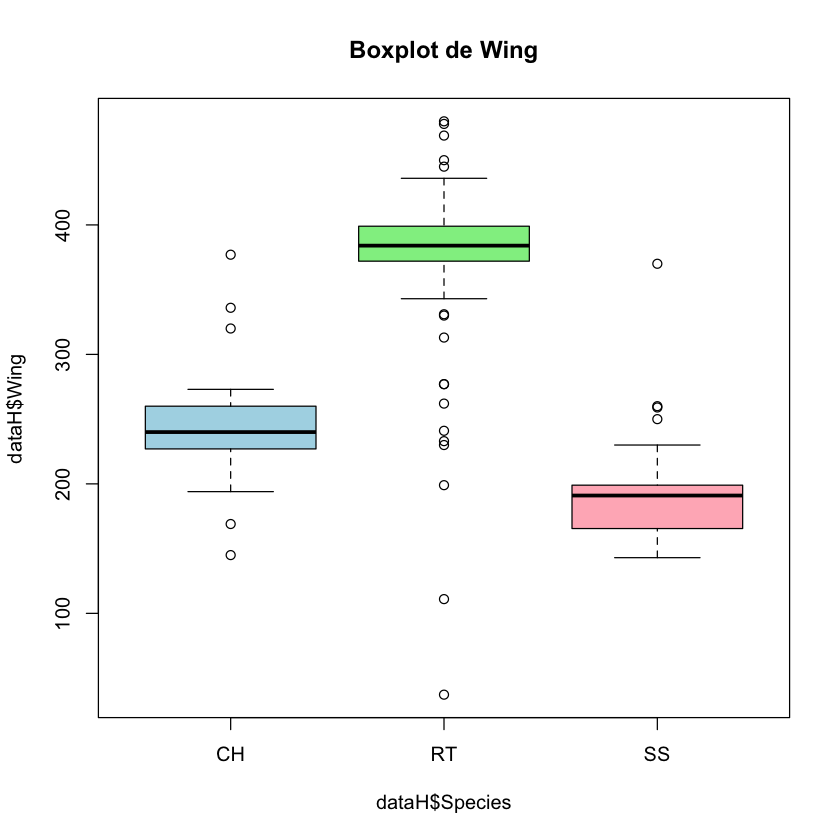

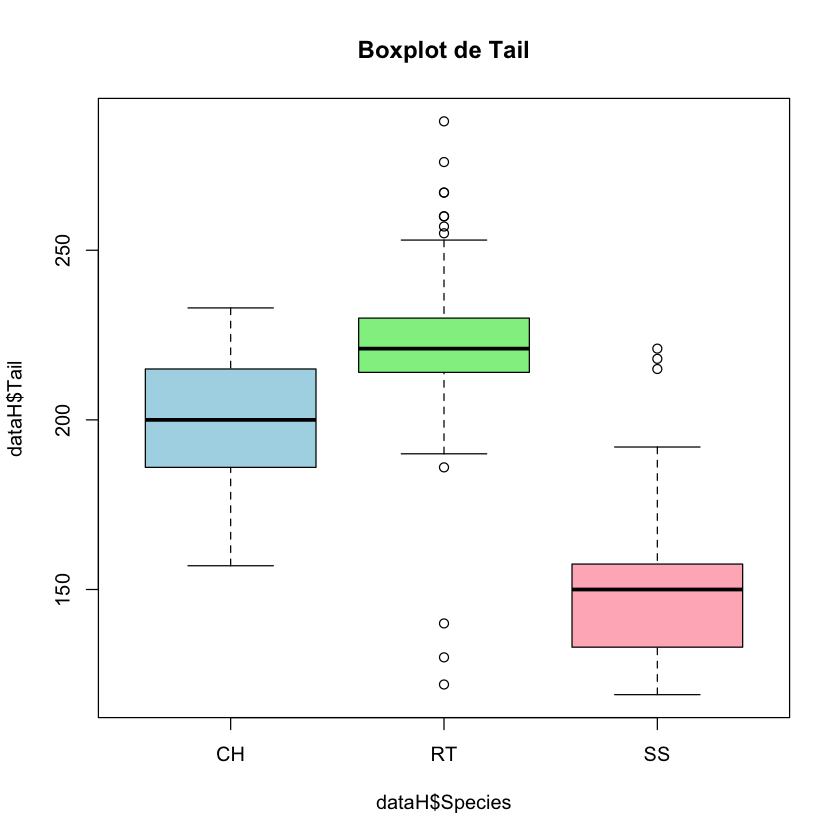

In [200]:
correlation <- cor(dataH$Wing, dataH$Tail)
print(paste("Correlación entre Wing y Tail:", correlation))

par(bg = "white")
boxplot(dataH$Wing ~ dataH$Species, 
    main = "Boxplot de Wing",  
    col = c("lightblue", "lightgreen", "lightpink"), 
    outline = TRUE)
boxplot(dataH$Tail ~ dataH$Species, 
    main = "Boxplot de Tail",  
    col = c("lightblue", "lightgreen", "lightpink"),
    outline = TRUE)

## 2.3 Analizad mediante un Scatterplot cómo se relacionan ambas variables.

Por último, realizamos un Scatter Plot, para ver el comportamiento de las dos variables "enfretadas" etre sí. Para una mayor comprensión del grífco, se ha pintado cada punto con el color de la espécie al cual pertenecen dichos datos.

A rasgos generales, se diferencian claramente 3 grupos, en donde los Red-Tailed y los Sharp-Shinned tienen claramente su región. Los Cooper's es la clase más problemática, porque estan entremedias de las dos otras espécies, y además contamos con pocas muestras en comparación con las otras dos. Aún así, es muy probable afirmar que si colocamos un punto en la región central, esta formará parte de los CH.

Tal y como ibamos sospechando, por parte de los RT encontramos datos fuera de lo normal, como en la esquina inferior derecha, con la presencia de tres individuos con alas largas pero una cola pequeña. Por otro lado, también hay presencia de individuos especialmente grandes, presentes en la esquina superior derecha.

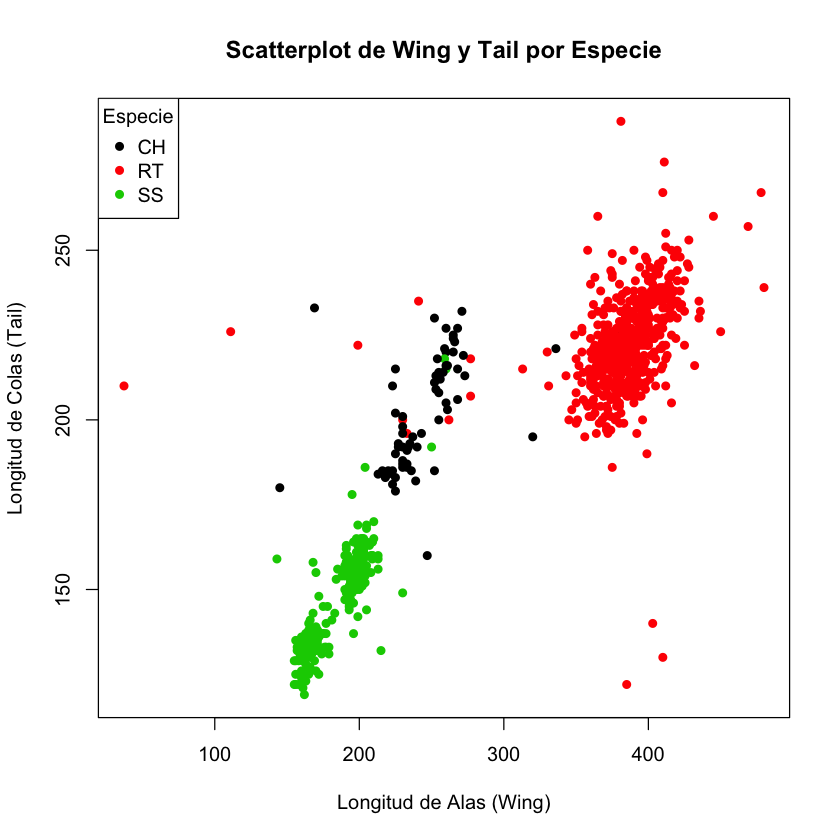

In [202]:
par(bg = "white")
plot(
  dataH$Wing,
  dataH$Tail,
  main = "Scatterplot de Wing y Tail por Especie",
  xlab = "Longitud de Alas (Wing)",
  ylab = "Longitud de Colas (Tail)",
  pch = 16,
  col = as.factor(dataH$Species)
)
legend("topleft", legend = levels(as.factor(dataH$Species)), col = 1:3, pch = 16, title = "Especie")


## Referencias

- [1]. How to validate date in R. (n.d.). Stack Overflow. https://stackoverflow.com/questions/13450360/how-to-validate-date-in-r
- [2]. https://scholarworks.boisestate.edu/cgi/viewcontent.cgi?article=1010&context=bio_facpubs
- [3]. Red-tailed Hawk Facts - NatureMapping. (n.d.). http://naturemappingfoundation.org/natmap/facts/espanol/red-tailed_hawk_es.html
